In [1]:
from space import Space
from THB_core import *
from datastructures import *
from funcs import *
from THB_utils import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bs1 = BSpline(knotvector=np.array([0, 0, 0, 0.2, 0.4, 0.6, 0.8, 1, 1, 1]), degree=2)
# bs2 = BSpline(knotvector=np.array([0, 0, 0, 0.2, 0.4, 0.6, 0.8, 1, 1, 1]), degree=2)

bs2 = BSpline(knotvector=np.array([0, 0, 0, 0, 0.2, 0.4, 0.6, 0.8, 1, 1, 1, 1]), degree=3)
# bs3 = BSpline(knotvector=np.array([0, 0, 0, 0.33, 0.66, 0.8, 1, 1, 1]), degree=2)

tp = TensorProduct(bsplines=[bs1, bs2])

In [3]:
h_space = Space(tensor_product=tp, num_levels=3)
h_space.build_hierarchy_from_domain_sequence()
ac_cells = compute_active_cells_active_supp(h_space.cells, h_space.fns, h_space.degrees)
fn_coeffs = compute_fn_projection_matrices(h_space.fns, h_space.Coeff, h_space.degrees)

In [4]:
coo = generate_parametric_coordinates((100, 100))
CP0 = grevilleAbscissae(h_space.sh_fns[0], h_space.degrees, h_space.knotvectors[0])
# CP1 = grevilleAbscissae(h_space.sh_fns[1], h_space.degrees, h_space.knotvectors[1])
ndim = 2
ctrl_pts = {lev: np.zeros((*h_space.sh_fns[lev], ndim)) for lev in range(3)}
ctrl_pts[0] = CP0
# ctrl_pts[1] = CP1
CP = ControlPoints(h_space)
ac_spans = compute_active_span(coo, h_space.knotvectors, h_space.cells, h_space.degrees, h_space.sh_fns)
# PHI, num_supp = compute_tensor_product(coo, ac_spans, ac_cells, fn_coeffs, h_space.sh_fns, h_space.knotvectors, h_space.degrees)

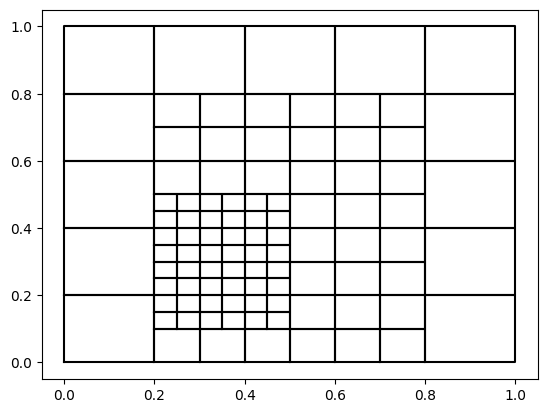

In [5]:
h_space.refine_basis_fn((3,3), 0)
h_space.build_hierarchy_from_domain_sequence()
h_space.refine_basis_fn((4,4), 1)
ac_cells = compute_active_cells_active_supp(h_space.cells, h_space.fns, h_space.degrees)
fn_coeffs = compute_fn_projection_matrices(h_space.fns, h_space.Coeff, h_space.degrees)


ac_spans = compute_active_span(coo, h_space.knotvectors, h_space.cells, h_space.degrees, h_space.sh_fns)
# PHI, num_supp = compute_tensor_product(coo, ac_spans, ac_cells, fn_coeffs, h_space.sh_fns, h_space.knotvectors, h_space.degrees)
# print(ac_spans[5555], PHI[5555], ac_cells[1][(5, 5)])

plot = plt.subplots()
plotGrid(plot, h_space.cells, h_space.knotvectors, h_space.degrees)

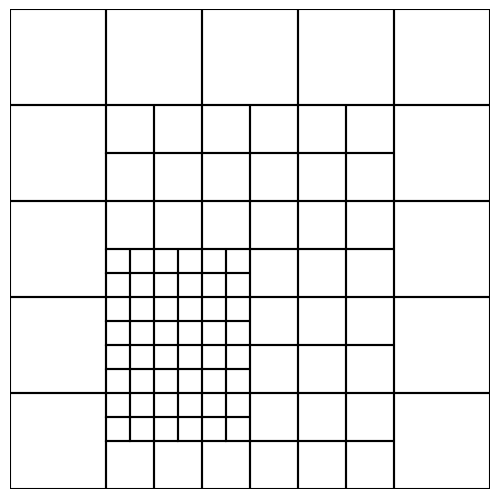

In [6]:
ctrl_pts = CP.update_CP(ctrl_pts, h_space.fns, h_space.Coeff)
plot2DAdaptiveGrid(ac_cells, ctrl_pts, h_space.knotvectors, fn_coeffs, h_space.sh_fns, h_space.degrees)
# output = evaluate(PHI, ctrl_pts, ac_spans, num_supp, ac_cells)
# plt.scatter(output[:,0], output[:,1])
# cp0 = ctrl_pts[0].reshape(-1, 2)
# cp1 = ctrl_pts[1].reshape(-1, 2)
# CP0 = CP0.reshape(-1, 2)
# plt.scatter(CP0[:, 0], CP0[:, 1])
# plt.scatter(cp1[:,0], cp1[:,1])

In [7]:
print(coo[3500], ac_spans[3500])
print(ac_cells[0][0, 1])

[1.000000e-05 3.500065e-01] (0, (0, 1))
[(0, (0, 1)), (0, (0, 2)), (0, (0, 3)), (0, (0, 4)), (0, (1, 1)), (0, (1, 2)), (0, (1, 3)), (0, (1, 4)), (0, (2, 1)), (0, (2, 2)), (0, (2, 3)), (0, (2, 4))]
